In [22]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

import random

random.seed(10)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Sine Wave Building Up

Mean of f  0.0


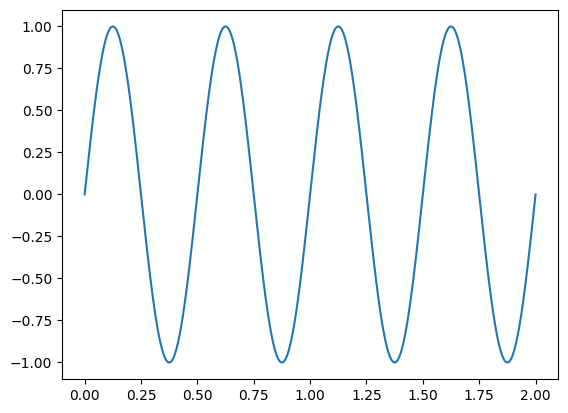

In [45]:
starttime = 0.0
endtime = 2.0
steps = 5000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

## RANDOM RESERVOIR

In [ ]:
from ESN import Reservoir
from IPReservoir import IPReservoir 

N = 100

reservoir = Reservoir(N = N, bias = True, ro_rescale=0.96)

In [ ]:
s =  reservoir.predict(f)

In [ ]:
s.shape

torch.Size([5000, 100])

In [ ]:
reservoir.de_fi()

0.08933445575240351

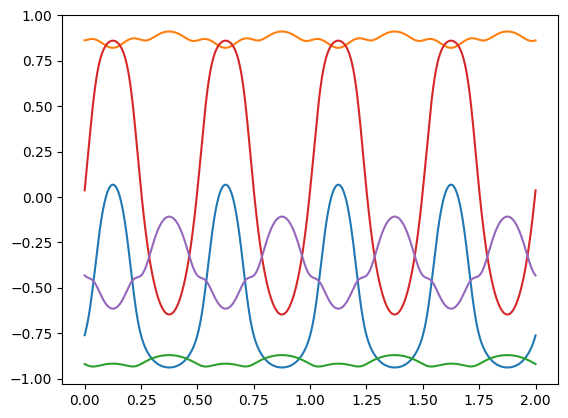

In [ ]:

plt.plot(t, reservoir.predict(f)[:, 0:5])

## UNIMODAL

In [ ]:
from IntrinsicPlasticity import IPMask

In [ ]:
ip_res = IPReservoir(N=N, bias = False, mask=IPMask.normalMask(N), input_scaling=0.1)

In [ ]:
ip_res.rescale_weights(0.9)

In [ ]:
ip_res.pre_train(eta=0.0025, U=f, epochs=5)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1226.115478515625.
- Epoch: 2) | KL Divergence value: 1204.7537841796875.
- Epoch: 3) | KL Divergence value: 1198.5350341796875.
- Epoch: 4) | KL Divergence value: 1200.506103515625.
- Epoch: 5) | KL Divergence value: 1208.26708984375.


No transient applied. Reservoir was already warmed up


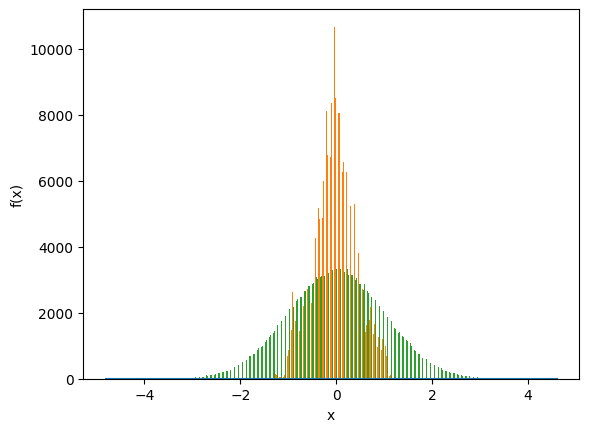

In [ ]:
ip_res.pre_train(f, 0, 0)
ip_res.predict(f, save_gradients=False, save_states=True)
ip_res.plot_global_neural_activity()

In [ ]:
ip_res.predict(f).shape

torch.Size([5000, 100])

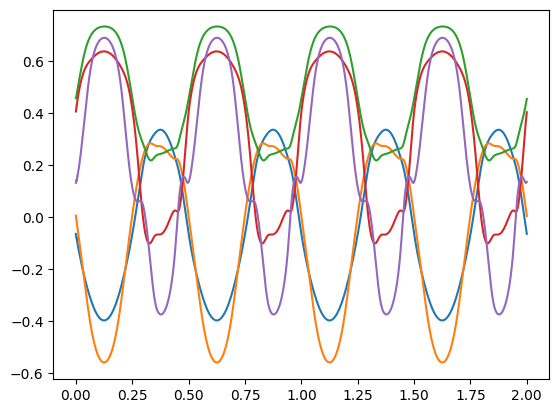

In [ ]:
plt.plot(t, ip_res.predict(f).detach()[:, 0:5])

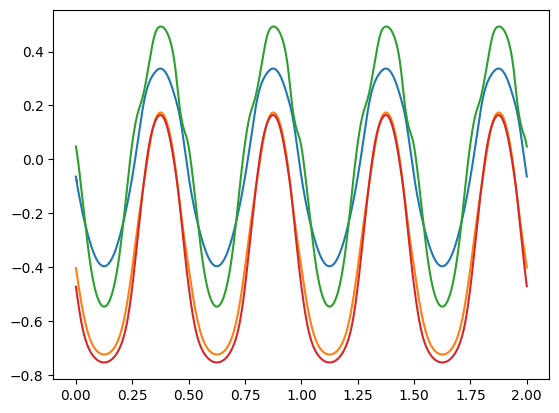

In [ ]:
plt.plot(t, ip_res.predict(f).detach()[:, [0, 91, 43, 21]])

In [ ]:
ip_res.de_fi()

0.05283128877978883

In [ ]:
ip_res.LCE(f)

-0.04210451

In [ ]:
ip_res.max_eigs()

tensor(1.0370)

## BIMODAL

In [ ]:
bimodal_res = IPReservoir(N=N, mask=IPMask.mixedBimodalMask(N), ro_rescale=0.25, input_scaling=0.5)

In [ ]:
bimodal_res.pre_train(f, 0.000025, 5)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 909.8413696289062.
- Epoch: 2) | KL Divergence value: 952.320556640625.
- Epoch: 3) | KL Divergence value: 1073.5858154296875.
- Epoch: 4) | KL Divergence value: 1213.236572265625.
- Epoch: 5) | KL Divergence value: 1360.142333984375.


No transient applied. Reservoir was already warmed up


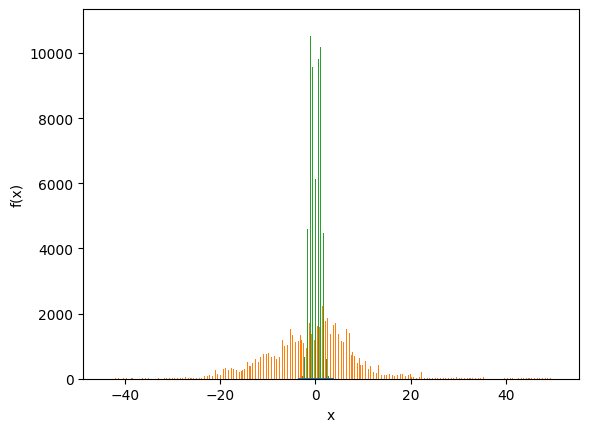

In [ ]:
bimodal_res.pre_train(f, 0, 0)
bimodal_res.predict(f, save_gradients=False, save_states=True)
bimodal_res.plot_global_neural_activity()

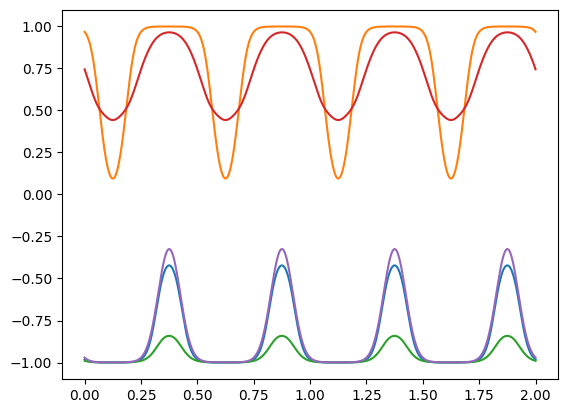

In [ ]:
plt.plot(t, bimodal_res.predict(f).detach()[:, 0:5])

In [ ]:
bimodal_res.de_fi()

0.12042260037411809

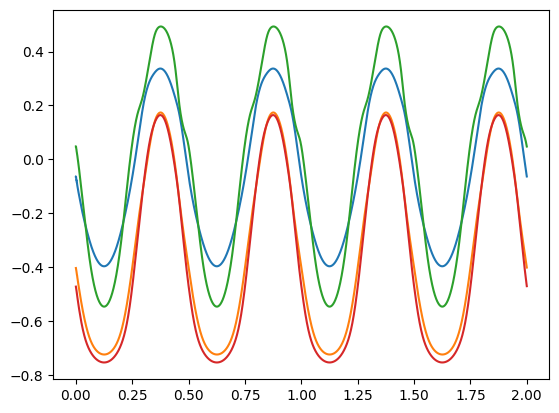

In [ ]:
plt.plot(t, ip_res.predict(f).detach()[:, [0, 91, 43, 21]])

In [ ]:
bimodal_res.LCE(f)

-3.3321795

## TRIMODAL

In [ ]:
trimodal_res = IPReservoir(N=N, ro_rescale=0.25, mask=IPMask.trimodal(N, 0.6))

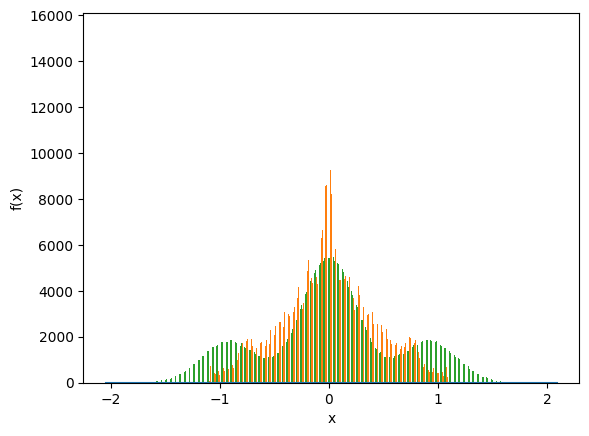

In [ ]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_global_neural_activity()

In [ ]:
trimodal_res.pre_train(f, 0.00000025)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 609.1953735351562.
- Epoch: 2) | KL Divergence value: 608.0932006835938.
- Epoch: 3) | KL Divergence value: 607.459228515625.
- Epoch: 4) | KL Divergence value: 607.2797241210938.
- Epoch: 5) | KL Divergence value: 607.5387573242188.
- Epoch: 6) | KL Divergence value: 608.2198486328125.
- Epoch: 7) | KL Divergence value: 609.3084716796875.
- Epoch: 8) | KL Divergence value: 610.7884521484375.
- Epoch: 9) | KL Divergence value: 612.6448364257812.
- Epoch: 10) | KL Divergence value: 614.8622436523438.


No transient applied. Reservoir was already warmed up


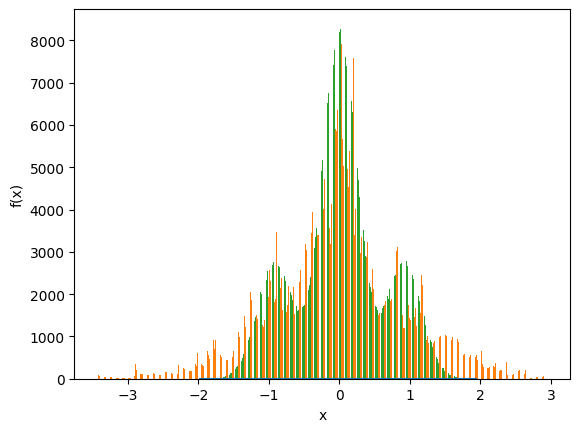

In [ ]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_global_neural_activity()

In [ ]:
trimodal_res.de_fi()

0.15527244272603147

In [ ]:
trimodal_res.LCE(f)

-1.079445